# AdultData (Shephertz Technologies)

In [1]:
#importing the libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as ske 

import matplotlib.pyplot as plt

%matplotlib inline

The Adultdata.xlsx dataset contains 13 different attributes of an individual such as his/her Workclass, Education, Marital Status, etc. and on target variable. The target variable specifies whether that individuals salary is less than or more than 50K.

In [2]:
# reading the exel file
data = pd.read_excel("C:/Users/hp/Desktop/Shephertz/Adultdata.xlsx", sheet_name = 0, header = 0)
data.head()                    

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Data Preprocessing

Checking and dropping the number of null values in our dataset.

In [3]:
print(data[data.isnull().any(axis = 1)].shape)
data = data.dropna()
print(data.shape)

(1, 15)
(19601, 15)


In [4]:
data = data.replace(' ?', np.nan)
data.dropna()
data.shape

(19601, 15)

Understanding the data with **decriptive statistics**.

In [5]:
data[['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']].describe()

,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Country,Target
count,18505,19601,19601,18502,19601,19601,19601,19250,19601
unique,8,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,13630,6407,8974,2502,7876,16787,13106,17540,14923


## Visualizing some insights

We tried to gain some insights by statistically visualizing the *Adultdata*. 

Below is the code generating different pandas series for the number of each race earning a salary greater and lower than 50K.

In [6]:
# filter for salary less than 50K
less_salary = data['Target'].str.contains('<=50K')
low_sal = data[less_salary]
print(low_sal.shape)

#filter for salary more then 50K
more_salary = data['Target'].str.contains('>50K')
high_sal = data[more_salary]
print(high_sal.shape)

(14923, 15)
(4678, 15)


In [7]:
# counting the number of each race of salary <=50k
race_count1 = low_sal[['Target','Race']].groupby('Race').count()
print(race_count1, '\n')

# counting the number of each race of salary >50k
race_count2 = high_sal[['Target','Race']].groupby('Race').count()
print(race_count2)

                     Target
Race                       
 Amer-Indian-Eskimo     171
 Asian-Pac-Islander     462
 Black                 1615
 Other                  153
 White                12522 

                     Target
Race                       
 Amer-Indian-Eskimo      19
 Asian-Pac-Islander     154
 Black                  227
 Other                   13
 White                 4265


Now we have the count of different Races earning salaries of lower and higher categories respectively. But, just the statistics are not enough to visualize the full picture clearly. We used matplotlib library to plot the data and gain a better understanding.

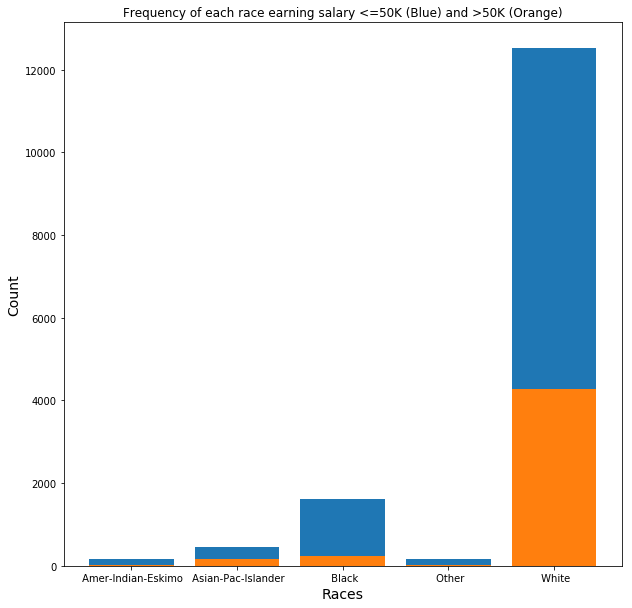

In [8]:
values = list(race_count1["Target"])
names = list(race_count1.index)

values2 = list(race_count2["Target"])
names2 = list(race_count2.index)

plt.figure(1, figsize = (10,10))
plt.bar(names, values)
plt.bar(names, values2)

plt.title('Frequency of each race earning salary <=50K (Blue) and >50K (Orange)')
plt.xlabel('Races', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

It can be seen from the above bar graph that the White people are equally dominating in the number of peoples in both the salary categories. The share of Black people is far less in spite of being the largest local minority(12.1%) in the USA ( source: Wikipedia)

         Target
Sex            
 Female    5786
 Male      9137 

         Target
Sex            
 Female     709
 Male      3969


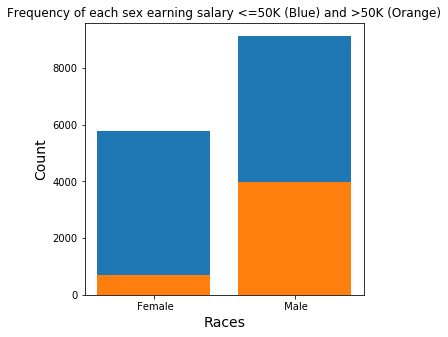

In [9]:
# counting the number of each sex of salary <=50k
sex_count1 = low_sal[['Target','Sex']].groupby('Sex').count()
print(sex_count1, '\n')

# counting the number of each sex of salary >50k
sex_count2 = high_sal[['Target','Sex']].groupby('Sex').count()
print(sex_count2)

values = list(sex_count1["Target"])
names = list(sex_count1.index)

values2 = list(sex_count2["Target"])
names2 = list(sex_count2.index)

plt.figure(1, figsize = (5,5))
plt.bar(names, values)
plt.bar(names, values2)

plt.title('Frequency of each sex earning salary <=50K (Blue) and >50K (Orange)')
plt.xlabel('Races', size = 14)
plt.ylabel('Count', size = 14)
plt.show()

Another significant finding is the share of women in high salary working class. The number of women getting paid higher than 50k is drastically less compared to the number of women in lower salary category.

## Deploying Tree Algorithms

Decision tree algorithms are deployed because they can work with both *qualitative* and *quantitative* types of variables we are having in our dataset.

### Converting features into categorical variables and coding

For deploying machine learning classification algorithms it is necessary to transform the string lists into categorical variables. We can then form integer codes from those qualitative categorical variables which are better understood by the classifier.

In [10]:
features = ['Workclass', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target']

for column in features:
    data[column] = data[column].astype("category").cat.codes

Deleting unnecessary features can save both time and effort. The data for features such as **Capital Gain** and **Capital Loss** is of no use in the prediction of salary as for most of the people its value is zero.

In [11]:
data.drop(['Education', 'Capital Gain', 'Capital Loss'], axis = 1, inplace = True)
data.head()

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target
0,39,6,77516,13,4,0,1,4,1,40.0,37,0
1,50,5,83311,13,2,3,0,4,1,13.0,37,0
2,38,3,215646,9,0,5,1,4,1,40.0,37,0
3,53,3,234721,7,2,5,0,2,1,40.0,37,0
4,28,3,338409,13,2,9,5,2,0,40.0,4,0


Our predictor variables are the first 11 parameters and the target variable is the last parameters which determine whether the salary of a person is less than or more than 50K. 

It is necessary to create separate *nd arrays* for predictor and target variables in order to train them on different statistical learning algorithms using *sklearn* library

In [12]:
#converting the dataset into predictor and target arrays
array = data.values
X = array[:, 0:11]
Y = array[:, 11]

### Determining the important features

We can determine the potential or importance of each feature in predicting the target variable using the *ExtraTreesClassifier* class in sklearn ensembles. Though there are many algorithms to select the best features such as *Recursive Feature Elimination* and *Principal Component Analysis* it is better to use ExtraTreesClassifier when you are planning to deploy Decision Tree Classification.

In [13]:
model1 = ske.ExtraTreesClassifier()
model1.fit(X,Y)
print(model1.feature_importances_)

[ 0.17934446  0.05316964  0.18672492  0.14219879  0.09248251  0.09302247
  0.07314364  0.0178865   0.03032723  0.11052004  0.02117979]


The least importatnt features are **Country**, **Sex**, **Race** and **Workclass**

### K-fold Cross-Validation

K-fold is the most reliable algorithm for evaluation of any Machine Learning Technique. Is divides the dataset into k random splits and at each iteration it uses one piece to test and rest of the other to train. The process goes on till the algorithm is tested k times. Finally, it returns mean value of scores of each of the k iterations.

We are using K-Fold cross-validation with 10 splits of the dataset and a seed value of 7 in order to get consistent results

In [14]:
seed = 7 
kfold = KFold(n_splits=10, random_state=seed) 

## Improving Decision Tree through Bagging

Bagging reduces the variance of the DesisionTreeClassifier and gives better results. It takes multiple samples of trees from the same training dataset and returns the mean value. The number of trees B is not a critical parameter with bagging; using a very large value of B will not lead to overﬁtting. In practice, we use a value of B suﬃciently large that the error has settled down. Using B = 100 is suﬃcient to achieve good performance in this example.

In [15]:
base = DecisionTreeClassifier() 

#specifying the number of bagged trees as 100
model2 = ske.BaggingClassifier(base_estimator=base, n_estimators= 100, random_state=seed) 
results2 = cross_val_score(model2, X, Y, cv=kfold) 
print(results2.mean())

0.818836183122


## Further improving the results through Random Forests

In bagging, most of the trees will use the strong predictor in the top split. Consequently, all of the bagged trees will look quite similar to each other and results in correlation among trees. Random forests further reduce the variance by *decorrelating* bagged trees. When building these decision trees, each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split, and typically we choose m ≈√p—that is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors. In our case the √11 = 3.31.  

### Determining the best parameters for Random Forests

There are certain parameters associated with the *RandomForestsClassifier* class of sklearn. We need to determine the best combination of those parameters in order to get accurate results.

Following code displays different parameters of RandomForestsClassifier and their default values.

In [16]:
rf = ske.RandomForestClassifier(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### Using Random Search with Cross-Validation

It performs a randomized search on hyperparameters. The parameters of the estimator used to apply these methods are optimized by a cross-validated search over parameter settings. Each parameter is explained in the code below.

In [17]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ske.RandomForestClassifier(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# accuracy scoring is used, suitable for classification setting
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='accuracy', 
                              cv = 3, verbose=2, random_state=42, n_jobs= -1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X, Y);

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.3min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000}

#### Deploying the Random Forests with the best parametes derived from RandomizedSreachCV

In [20]:
# using random selection on 3 features and classification with 100 trees
model3 = ske.RandomForestClassifier(n_estimators= 2000, max_depth = 10, min_samples_split = 10, min_samples_leaf = 1,
                                    bootstrap = True, random_state = seed ) 
results3 = cross_val_score(model3, X, Y, cv=kfold) 

# mean() method return the mean value of the accuracy
# can be converted into percentage by multiplying with 100
print(results3.mean())

0.837151494968


In [21]:
print(results3.std())

0.00669766350404


## Boosting Algorithms

Here trees are constructed in a sequence with improvement in each step. Boosting Algorithms are usually slower than bagging but they could be more accurate. Let us See!!

### Gradient Boosting 

Gradient boosting (GB) is a machine learning algorithm developed in the late '90s that is still very popular. It produces state-of-the-art results for many commercial (and academic) applications.

The aim of gradient boosting is to create (or "train") an ensemble of trees, given that we know how to train a single decision tree. This technique is called boosting because we expect an ensemble to work much better than a single estimator.

### Determining the best parameters for Gradient Boosting

Earlier we determined the best set of parameters for Random Forests. Similarly, using RandomizedSrearchCV we can obtain the best parameters for Gradient Boosting as well. The best parameters obtained are as follows:

{'max_depth': 3,  
 'min_samples_leaf': 2,  
 'min_samples_split': 10,  
 'n_estimators': 200,  
 'warm_start': True}
 
#### Deploying the GradientBoostingClassifier with the best parameters derived from RandomizedSreachCV

In [15]:
#gradient Boosting
model5 = ske.GradientBoostingClassifier(max_depth = 3, min_samples_leaf = 2, min_samples_split = 10,
                                        warm_start = True, n_estimators= 200, random_state = 42)
results5 = cross_val_score(model5, X, Y, cv=kfold) 
print(results5.mean())

0.839600214385
